In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [219]:
data = pd.read_csv('/content/startup_funding.csv')
data

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [220]:
data.isnull().sum()

,0
Sr No,0
Date dd/mm/yyyy,0
Startup Name,0
Industry Vertical,171
SubVertical,936
City Location,180
Investors Name,24
InvestmentnType,4
Amount in USD,960
Remarks,2625


In [221]:
data.duplicated().sum()

np.int64(0)

In [222]:
data.rename(columns={'Date dd/mm/yyyy' : 'date'} ,inplace=True)

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   date               3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [224]:
data['date'] = pd.to_datetime(data['date'],dayfirst = True,errors='coerce')

In [225]:
data['day'] = data['date'].dt.day.astype('Int32')
data['month'] = data['date'].dt.month_name()
data['year'] = data['date'].dt.year.astype('Int32')
data

,Sr No,date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,day,month,year
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,9,January,2020
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,13,January,2020
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN,9,January,2020
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN,2,January,2020
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN,2,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,3040,2015-01-29,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN,29,January,2015
3040,3041,2015-01-29,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund,29,January,2015
3041,3042,2015-01-30,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN,30,January,2015
3042,3043,2015-01-30,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake",30,January,2015


In [226]:
data['Amount in USD'] = data['Amount in USD'].fillna(0)
data

,Sr No,date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,day,month,year
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,9,January,2020
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,13,January,2020
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN,9,January,2020
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN,2,January,2020
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN,2,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,3040,2015-01-29,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN,29,January,2015
3040,3041,2015-01-29,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund,29,January,2015
3041,3042,2015-01-30,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN,30,January,2015
3042,3043,2015-01-30,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,0,"Strategic Funding, Minority stake",30,January,2015


In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              3044 non-null   int64         
 1   date               3036 non-null   datetime64[ns]
 2   Startup Name       3044 non-null   object        
 3   Industry Vertical  2873 non-null   object        
 4   SubVertical        2108 non-null   object        
 5   City  Location     2864 non-null   object        
 6   Investors Name     3020 non-null   object        
 7   InvestmentnType    3040 non-null   object        
 8   Amount in USD      3044 non-null   object        
 9   Remarks            419 non-null    object        
 10  day                3036 non-null   Int32         
 11  month              3036 non-null   object        
 12  year               3036 non-null   Int32         
dtypes: Int32(2), datetime64[ns](1), int64(1), object(9)
memory usag

In [228]:
data['Amount in USD']= data['Amount in USD'].astype(str)

In [229]:
data['Amount in USD'] = data['Amount in USD'].str.replace(',','',regex = True)
data['Amount in USD'] = data['Amount in USD'].str.replace('undisclosed','',regex=True)
data['Amount in USD'] = pd.to_numeric(data['Amount in USD'],errors='coerce')

In [230]:
data['Amount in USD'] = data['Amount in USD'].fillna(0).astype('int64')

In [231]:
data['Startup Name'] = data['Startup Name'].astype('category')
data['Industry Vertical']=  data['Industry Vertical'].astype('category')
data['SubVertical']=  data['SubVertical'].astype('category')


In [232]:
data.columns = data.columns.str.strip()


In [233]:
data.rename(columns={'City  Location' : 'City'},inplace=True)
data

,Sr No,date,Startup Name,Industry Vertical,SubVertical,City,Investors Name,InvestmentnType,Amount in USD,Remarks,day,month,year
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000,NaN,9,January,2020
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394,NaN,13,January,2020
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860,NaN,9,January,2020
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000,NaN,2,January,2020
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,NaN,2,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,3040,2015-01-29,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000,NaN,29,January,2015
3040,3041,2015-01-29,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000,Govt backed VC Fund,29,January,2015
3041,3042,2015-01-30,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000,NaN,30,January,2015
3042,3043,2015-01-30,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,0,"Strategic Funding, Minority stake",30,January,2015


In [234]:
data['City'] = data['City'].str.strip()
data

,Sr No,date,Startup Name,Industry Vertical,SubVertical,City,Investors Name,InvestmentnType,Amount in USD,Remarks,day,month,year
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000,NaN,9,January,2020
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394,NaN,13,January,2020
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860,NaN,9,January,2020
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000,NaN,2,January,2020
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,NaN,2,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,3040,2015-01-29,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000,NaN,29,January,2015
3040,3041,2015-01-29,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000,Govt backed VC Fund,29,January,2015
3041,3042,2015-01-30,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000,NaN,30,January,2015
3042,3043,2015-01-30,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,0,"Strategic Funding, Minority stake",30,January,2015


In [235]:
city_mapping = {
    "Bengaluru": "Bangalore",
    "New Delhi": "Delhi",
    "Delhi NCR": "Delhi",
    "NCR": "Delhi",
    "Bombay": "Mumbai",
    "Gurgaon": "Gurugram",
    "Noida": "Noida",
    "Hyderabad": "Hyderabad",
    "Bangaluru": "Bangalore",
    "Bengalore": "Bangalore",
}

data['City'] = data['City'].replace(city_mapping)

In [236]:
data['City'] = data['City'].fillna('unknown')
data['City'] = data['City'].astype('category')

In [237]:
data

,Sr No,date,Startup Name,Industry Vertical,SubVertical,City,Investors Name,InvestmentnType,Amount in USD,Remarks,day,month,year
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,200000000,NaN,9,January,2020
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurugram,Susquehanna Growth Equity,Series C,8048394,NaN,13,January,2020
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860,NaN,9,January,2020
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,Delhi,Vinod Khatumal,Pre-series A,3000000,NaN,2,January,2020
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,NaN,2,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,3040,2015-01-29,Printvenue,NaN,NaN,unknown,Asia Pacific Internet Group,Private Equity,4500000,NaN,29,January,2015
3040,3041,2015-01-29,Graphene,NaN,NaN,unknown,KARSEMVEN Fund,Private Equity,825000,Govt backed VC Fund,29,January,2015
3041,3042,2015-01-30,Mad Street Den,NaN,NaN,unknown,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000,NaN,30,January,2015
3042,3043,2015-01-30,Simplotel,NaN,NaN,unknown,MakeMyTrip,Private Equity,0,"Strategic Funding, Minority stake",30,January,2015


In [238]:
data['SubVertical']= data['SubVertical'].cat.add_categories('unknown')
data['SubVertical']= data['SubVertical'].fillna('unknown')

In [239]:
subvertical_mapping = {
    "E commerce": "E-Commerce",
    "ecommerce": "E-Commerce",
    "FinTech": "Financial Technology",
    "fin tech": "Financial Technology",
    "Ed-Tech": "Education Technology",
    "FoodTech": "Food Technology",
    'Elearning' : 'E-learning',
    'Agritech' : 'Agriculture Technology'
}


data['SubVertical'] = data['SubVertical'].replace(subvertical_mapping)
data.tail(60)

/tmp/ipython-input-798402731.py:13: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['SubVertical'] = data['SubVertical'].replace(subvertical_mapping)


,Sr No,date,Startup Name,Industry Vertical,SubVertical,City,Investors Name,InvestmentnType,Amount in USD,Remarks,day,month,year
2984,2985,2015-02-25,IndustryBuying,NaN,unknown,unknown,SAIF Partners,Private Equity,2000000,Series A,25,February,2015
2985,2986,2015-02-26,FreshWorld,NaN,unknown,unknown,"Kris Gopalakrishnan, Nagaraja Prakasam",Seed\\nFunding,0,NaN,26,February,2015
2986,2987,2015-02-26,TinyOwl,NaN,unknown,unknown,"Matrix Partners, Sequoia Capital, Nexus Ventur...",Private Equity,16000000,Series B,26,February,2015
2987,2988,2015-02-27,Momoe,NaN,unknown,unknown,"IDG Ventures India, Jungle Ventures, India Quo...",Seed\\nFunding,1200000,NaN,27,February,2015
2988,2989,2015-02-27,Grofers,NaN,unknown,unknown,"Tiger Global Management, Sequoia Capital India",Private Equity,10000000,Series A,27,February,2015
2989,2990,2015-01-02,LensKart,NaN,unknown,unknown,"TPG Growth, TR Capital, IDG Ventures",Private Equity,2150000,NaN,2,January,2015
2990,2991,2015-01-02,VioletStreet,NaN,unknown,unknown,"Venkat Vallabhneni, Sudhakar Reddy, Srinivasa ...",Seed\\nFunding,315000,NaN,2,January,2015
2991,2992,2015-01-05,Lookup,NaN,unknown,unknown,"DeNA Co., Japan & Teruhide Sato (in Addition t...",Seed\\nFunding,380000,NaN,5,January,2015
2992,2993,2015-01-05,#Fame,NaN,unknown,unknown,TO THE NEW Ventures,Private Equity,10000000,NaN,5,January,2015
2993,2994,2015-01-05,Gympik,NaN,unknown,unknown,"Tom Clausen, Rohan Ajila, Haldyn Glass",Seed Funding,135000,NaN,5,January,2015


In [240]:
data.head(40)
data['Industry Vertical'] = data['Industry Vertical'].cat.add_categories('unknown')

In [241]:
data['Industry Vertical'] = data['Industry Vertical'].fillna('unknown')

In [242]:
data['Industry Vertical'] = data['Industry Vertical'].str.replace(r'and',',', regex=True)


In [243]:
data['Industry Vertical'] = data['Industry Vertical'].str.replace(r'\s*,\s*', ' and ', regex=True)

In [244]:
industry_mapping = {
    "E-Commerce": "E-Commerce",
    "Ecommerce": "E-Commerce",
    "E-commerce Marketplace": "E-Commerce",
    "Online Shopping": "E-Commerce",

    "FinTech": "FinTech",
    "Financial Technology": "FinTech",
    "Payments": "FinTech",
    "Digital Wallet": "FinTech",

    "EdTech": "EdTech",
    "Education Technology": "EdTech",
    "Online Learning": "EdTech",

    "FoodTech": "FoodTech",
    "Food and Beverages": "FoodTech",
    "Online Food Delivery": "FoodTech",

    "HealthTech": "HealthTech",
    "Healthcare": "HealthTech",
    "Medical Services": "HealthTech",
    "Wellness": "HealthTech",

    "AgriTech": "AgriTech",
    "Agriculture": "AgriTech",
    "Farming": "AgriTech",
}

data['Industry Vertical'] = data['Industry Vertical'].replace(industry_mapping)



In [245]:
data['Startup Name'] = data['Startup Name'].cat.add_categories('unknown')

In [246]:
data['Startup Name'] = data['Startup Name'].fillna('unknown')

In [247]:
data['StartupName_Clean'] = data['Startup Name']

In [248]:
data['StartupName_Clean'] = data['StartupName_Clean'].str.lower()
data['StartupName_Clean'] = data['StartupName_Clean'].str.strip()

In [249]:
data['StartupName_Clean'] = data['StartupName_Clean'].str.lower()
data['StartupName_Clean'] = data['StartupName_Clean'].str.replace(r'(http://|https://|www\.)', '', regex=True)
data['StartupName_Clean'] = data['StartupName_Clean'].str.replace(r'\.(com|in|org|co\.in|net).*', '', regex=True)


In [250]:
data['StartupName_Clean'] = data['StartupName_Clean'].str.replace( r'\b(private limited|pvt ltd|pvt. ltd.|limited|ltd)\b', '', case=False, regex=True)

In [251]:
data['StartupName_Clean'] =data['StartupName_Clean'].str.strip()

In [252]:
startup_mapping = {
    "olacabs": "Ola",
    "ola cabs": "Ola",
    "flipkart.com": "Flipkart",
    "flipkart": "Flipkart",
    "paytm mall": "Paytm",
    "paytm payments": "Paytm",
    "redbus": "Redbus",
}

data['StartupName_Clean'] = data['StartupName_Clean'].replace(startup_mapping)
data['StartupName_Clean'] = data['StartupName_Clean'].str.title()
data

,Sr No,date,Startup Name,Industry Vertical,SubVertical,City,Investors Name,InvestmentnType,Amount in USD,Remarks,day,month,year,StartupName_Clean
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,200000000,NaN,9,January,2020,Byju’S
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurugram,Susquehanna Growth Equity,Series C,8048394,NaN,13,January,2020,Shuttl
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860,NaN,9,January,2020,Mamaearth
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,Delhi,Vinod Khatumal,Pre-series A,3000000,NaN,2,January,2020,Wealthbucket
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,NaN,2,January,2020,Fashor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,3040,2015-01-29,Printvenue,unknown,unknown,unknown,Asia Pacific Internet Group,Private Equity,4500000,NaN,29,January,2015,Printvenue
3040,3041,2015-01-29,Graphene,unknown,unknown,unknown,KARSEMVEN Fund,Private Equity,825000,Govt backed VC Fund,29,January,2015,Graphene
3041,3042,2015-01-30,Mad Street Den,unknown,unknown,unknown,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000,NaN,30,January,2015,Mad Street Den
3042,3043,2015-01-30,Simplotel,unknown,unknown,unknown,MakeMyTrip,Private Equity,0,"Strategic Funding, Minority stake",30,January,2015,Simplotel


In [253]:
data.head(50)

,Sr No,date,Startup Name,Industry Vertical,SubVertical,City,Investors Name,InvestmentnType,Amount in USD,Remarks,day,month,year,StartupName_Clean
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,200000000,NaN,9,January,2020,Byju’S
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurugram,Susquehanna Growth Equity,Series C,8048394,NaN,13,January,2020,Shuttl
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860,NaN,9,January,2020,Mamaearth
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,Delhi,Vinod Khatumal,Pre-series A,3000000,NaN,2,January,2020,Wealthbucket
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,NaN,2,January,2020,Fashor
5,6,2020-01-13,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,9000000,NaN,13,January,2020,Pando
6,7,2020-01-10,Zomato,Hospitality,Online Food Delivery Platform,Gurugram,Ant Financial,Private Equity Round,150000000,NaN,10,January,2020,Zomato
7,8,2019-12-12,Ecozen,Technology,Agriculture Technology,Pune,Sathguru Catalyzer Advisors,Series A,6000000,NaN,12,December,2019,Ecozen
8,9,2019-12-06,CarDekho,E-Commerce,Automobile,Gurugram,Ping An Global Voyager Fund,Series D,70000000,NaN,6,December,2019,Cardekho
9,10,2019-12-03,Dhruva Space,Aerospace,Satellite Communication,Bangalore,"Mumbai Angels, Ravikanth Reddy",Seed,50000000,NaN,3,December,2019,Dhruva Space


In [254]:
data['date'].max()

Timestamp('2020-01-13 00:00:00')

In [255]:
data['Investors Name'] = data['Investors Name'].astype('category')
data['Investors Name'] =data['Investors Name'].cat.add_categories('unknown')

In [256]:
data['Investors Name'] = data['Investors Name'].fillna('unknown')

In [257]:
data.rename(columns={'InvestmentnType' : 'Investment Type'},inplace=True)

In [258]:
data['Investors Name'] = data['Investors Name'].str.replace(r'\s*,\s*', ' and ', regex=True)

In [259]:
data['Investors Name'].head(60)

,Investors Name
0,Tiger Global Management
1,Susquehanna Growth Equity
2,Sequoia Capital India
3,Vinod Khatumal
4,Sprout Venture Partners
5,Chiratae Ventures
6,Ant Financial
7,Sathguru Catalyzer Advisors
8,Ping An Global Voyager Fund
9,Mumbai Angels and Ravikanth Reddy


In [260]:
data['Investor List'] = data['Investors Name'].str.split(',')

In [261]:
data['Investors Name'] = data['Investors Name'].str.strip()          # remove leading/trailing spaces
data['Investors Name'] = data['Investors Name'].str.replace('  ', ' ', regex=True)  # fix double spaces
data['Investors Name'] = data['Investors Name'].fillna('Unknown')    # handle missing values

data['Investors Name'] = data['Investors Name'].str.replace('&', ',', regex=True)

data['Industry Vertical'] = data['Industry Vertical'].str.lower().str.strip()

text_cols = ['Startup Name', 'Industry Vertical', 'SubVertical', 'Investors Name']
for col in text_cols:
    data[col] = data[col].astype(str).str.replace("â€™", "'", regex=False)
    data[col] = data[col].str.encode("utf-8", "ignore").str.decode("utf-8")


In [262]:
data.tail()

,Sr No,date,Startup Name,Industry Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD,Remarks,day,month,year,StartupName_Clean,Investor List
3039,3040,2015-01-29,Printvenue,unknown,unknown,unknown,Asia Pacific Internet Group,Private Equity,4500000,NaN,29,January,2015,Printvenue,[Asia Pacific Internet Group]
3040,3041,2015-01-29,Graphene,unknown,unknown,unknown,KARSEMVEN Fund,Private Equity,825000,Govt backed VC Fund,29,January,2015,Graphene,[KARSEMVEN Fund]
3041,3042,2015-01-30,Mad Street Den,unknown,unknown,unknown,Exfinity Fund and GrowX Ventures.,Private Equity,1500000,NaN,30,January,2015,Mad Street Den,[Exfinity Fund and GrowX Ventures.]
3042,3043,2015-01-30,Simplotel,unknown,unknown,unknown,MakeMyTrip,Private Equity,0,"Strategic Funding, Minority stake",30,January,2015,Simplotel,[MakeMyTrip]
3043,3044,2015-01-31,couponmachine.in,unknown,unknown,unknown,UK based Group of Angel Investors,Seed Funding,140000,NaN,31,January,2015,Couponmachine,[UK based Group of Angel Investors]


# **EDA Part**

In [263]:
PerYear = data.groupby('year')

df_yearly = pd.DataFrame({
    'Total Funding (USD)': PerYear['Amount in USD'].sum(),
    'Number of Deals': PerYear['Startup Name'].count()
}).reset_index()

df_yearly


,year,Total Funding (USD),Number of Deals
0,2015,8597207368,929
1,2016,3828088608,993
2,2017,10429309730,687
3,2018,5116118369,309
4,2019,9686576534,111
5,2020,390207254,7


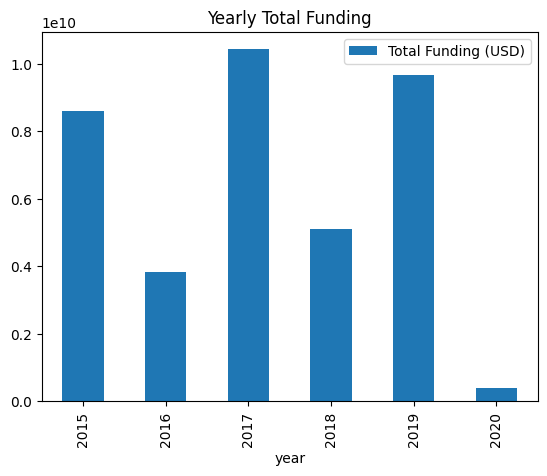

In [264]:
df_yearly.plot(x='year', y='Total Funding (USD)', kind='bar', title="Yearly Total Funding")
plt.show()

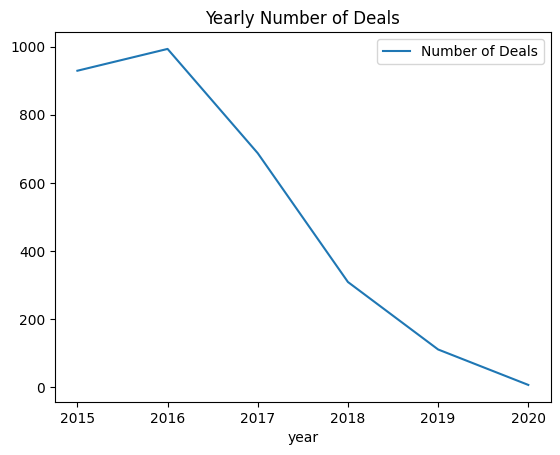

In [265]:

df_yearly.plot(x='year', y='Number of Deals', kind='line', title="Yearly Number of Deals")
plt.show()

In [266]:
PerMonth = data.groupby('month')

df_month = pd.DataFrame({
    'Total Funding AVG': PerMonth['Amount in USD'].mean(),
    'Number of Deals in month': PerMonth['Startup Name'].count()
}).reset_index()

df_month

,month,Total Funding AVG,Number of Deals in month
0,April,8.738338e+06,261
1,August,3.561459e+07,272
2,December,5.937244e+06,221
3,February,9.913515e+06,248
4,January,8.018311e+06,274
5,July,1.109249e+07,251
6,June,5.980097e+06,296
7,March,1.326344e+07,251
8,May,1.246029e+07,238
9,November,1.755056e+07,247


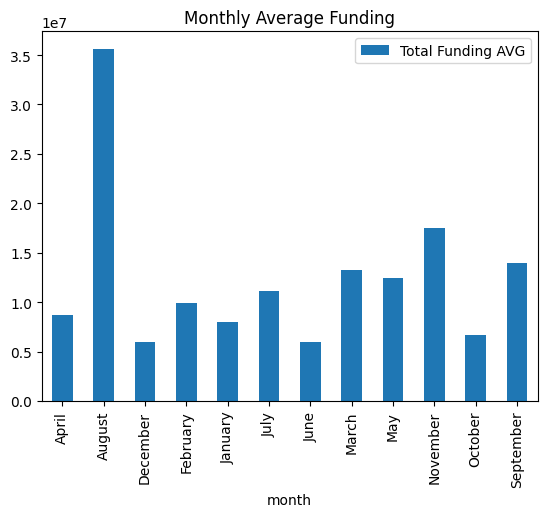

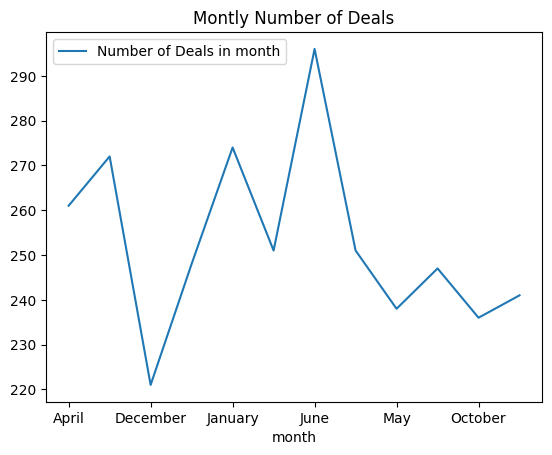

In [267]:
df_month.plot(x='month', y='Total Funding AVG', kind='bar', title="Monthly Average Funding")
plt.show()

print('\n\n\n')


df_month.plot(x='month', y='Number of Deals in month', kind='line', title="Montly Number of Deals")
plt.show()

In [268]:
PerYearMonthly = data.groupby(['year','month'])

df_yearmonth = pd.DataFrame({
    'Total Funding (USD)': PerYearMonthly['Amount in USD'].sum(),
    'Number of Deals': PerYearMonthly['Startup Name'].count()
}).reset_index()

df_pivot = df_yearmonth.pivot(index='month', columns='year', values='Total Funding (USD)')
df_pivot



year,2015,2016,2017,2018,2019,2020
month,,,,,,
April,9.805000e+08,253940000.0,7.323950e+08,1.980777e+08,1.157934e+08,NaN
August,1.063816e+09,534089000.0,2.748139e+09,8.093548e+08,4.531770e+09,NaN
December,3.058530e+08,187243000.0,2.844200e+08,5.771500e+07,4.769000e+08,NaN
February,3.942626e+08,331513000.0,2.949590e+08,1.211217e+09,2.266000e+08,NaN
January,3.693218e+08,699880000.0,2.532335e+08,3.473746e+08,1.370000e+08,390207254.0
July,1.534192e+09,233547000.0,1.677040e+08,5.519780e+08,2.967946e+08,NaN
June,5.369940e+08,199669000.0,3.448180e+08,3.914750e+08,2.971527e+08,NaN
March,4.633270e+08,309561608.0,2.264281e+09,2.919530e+08,NaN,NaN
May,3.241850e+08,339840000.0,1.786669e+09,1.058870e+08,4.089686e+08,NaN


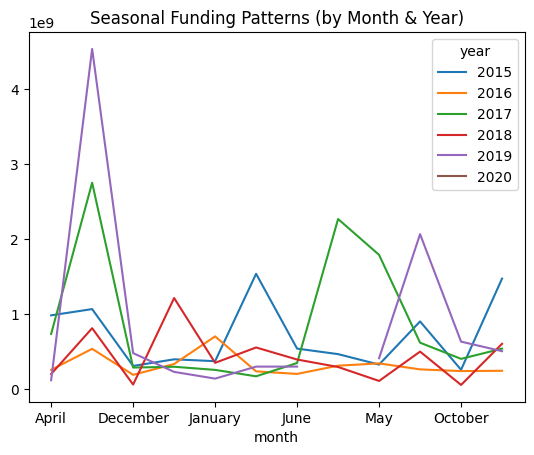

In [269]:
df_pivot.plot(title="Seasonal Funding Patterns (by Month & Year)")
plt.show()

In [270]:
Cities = data.groupby('City')
CityFund =Cities['Amount in USD'].sum().sort_values(ascending=False).head(10)

/tmp/ipython-input-480951276.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Cities = data.groupby('City')


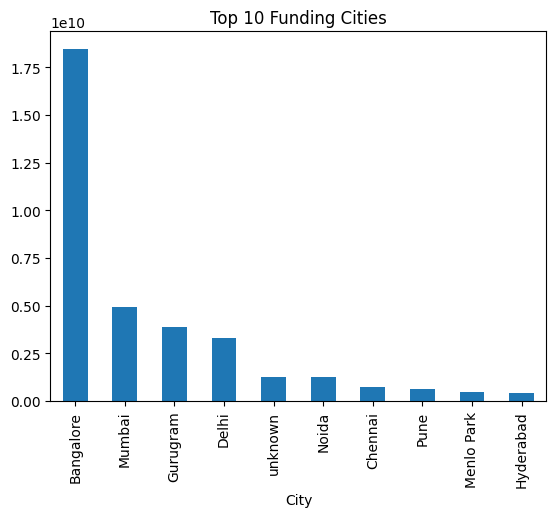

In [271]:
CityFund.plot(x='City', y='Amount in USD', kind='bar', title="Top 10 Funding Cities")
plt.show()

In [272]:
Cities = data.groupby('City')
CityStartup =Cities['Startup Name'].count().sort_values(ascending=False).head(10)
CityStartup

/tmp/ipython-input-2960928275.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Cities = data.groupby('City')


,Startup Name
City,
Bangalore,841
Mumbai,567
Delhi,455
Gurugram,337
unknown,180
Pune,105
Hyderabad,99
Chennai,97
Noida,92


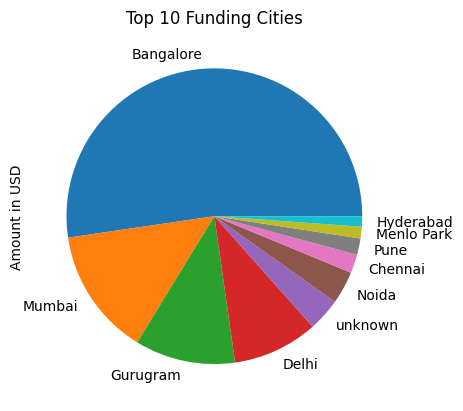

In [273]:
CityFund.plot(x='City', y='Startup Name', kind='pie', title="Top 10 Funding Cities")
plt.show()

In [274]:
#top 4 is the 80 Percent of the total funding

TotalFunding = data['Amount in USD'].sum()
Top4 = Cities['Amount in USD'].sum().sort_values(ascending=False).head(4)
City_Percentage =(Top4 /TotalFunding) *100
CityTotalFund = City_Percentage.cumsum()
print(CityTotalFund.iloc[3])

80.25740300159889


Industry Vertical
ecommerce                           6883410608
consumer internet                   6254084245
transportation                      3916632394
technology                          2229707930
finance                             1971438000
e-commerce                          1362983084
unknown                             1231811368
fintech                             1224211265
online marketplace                   700143000
e-commerce & m-commerce platform     680000000
Name: Amount in USD, dtype: int64


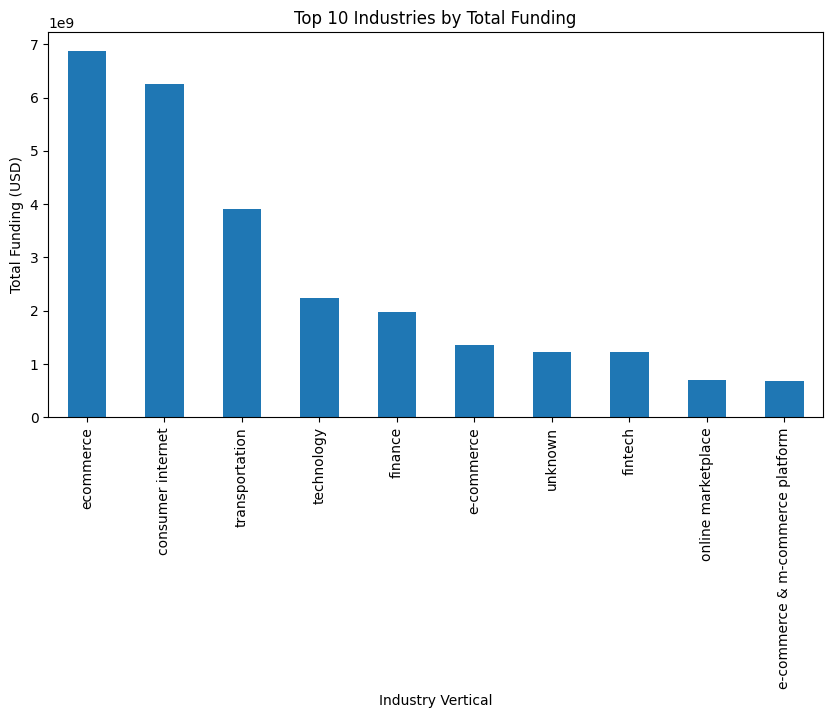

In [275]:
industry_funding = data.groupby('Industry Vertical')['Amount in USD'].sum().sort_values(ascending=False)

top_industries = industry_funding.head(10)

print(top_industries)

top_industries.plot(kind='bar', title="Top 10 Industries by Total Funding", figsize=(10,5))
plt.ylabel("Total Funding (USD)")
plt.show()


                                Industry Vertical  year  Amount in USD
0                                       ecommerce  2017     5900284000
1                                  transportation  2019     3908584000
2                               consumer internet  2017     2595576000
3                               consumer internet  2016     1918775000
4                               consumer internet  2018     1733483245
..                                            ...   ...            ...
841                 logistics automation platform  2015              0
842  location based engagement & rewards platform  2015              0
843                               local mobile os  2015              0
844                      live video streaming app  2015              0
845                    music streaming mobile app  2015              0

[846 rows x 3 columns]
   Industry Vertical  year  Amount in USD
0          ecommerce  2017     5900284000
1     transportation  2019     390858400

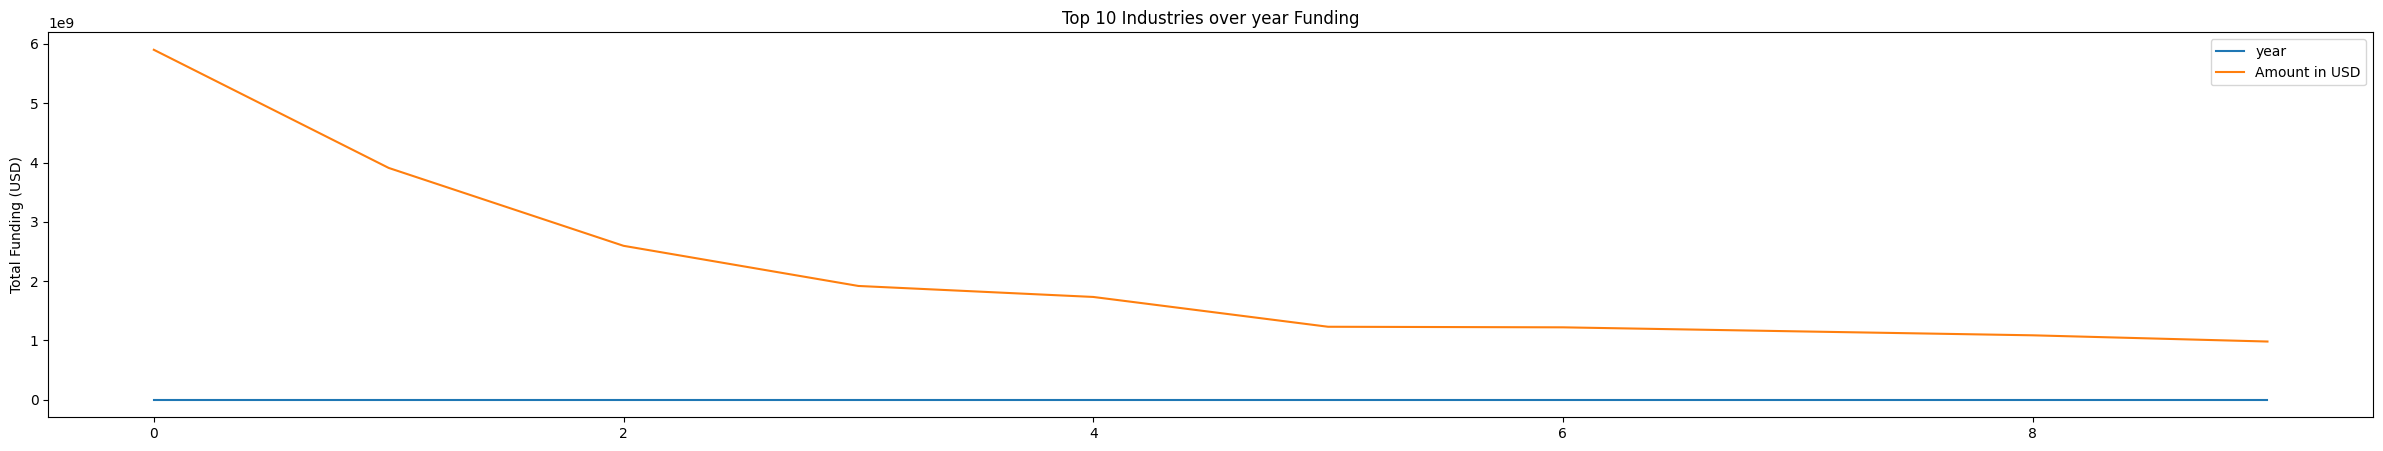

In [276]:
industry_funding_year = data.groupby(['Industry Vertical' , 'year'])['Amount in USD'].sum().sort_values(ascending=False).reset_index()
top_industries = data.groupby('Industry Vertical')['Amount in USD'].sum().sort_values(ascending=False).head(5).index
industry_funding_year
print(industry_funding_year)

top_industries_year = industry_funding_year.head(10)
print(top_industries_year)

top_industries_year.plot(kind='line', title="Top 10 Industries over year Funding", figsize=(30,5))
plt.ylabel("Total Funding (USD)")
plt.show()

     Industry Vertical  year  Amount in USD
0            ecommerce  2017     5900284000
1       transportation  2019     3908584000
2    consumer internet  2017     2595576000
3    consumer internet  2016     1918775000
4    consumer internet  2018     1733483245
8              finance  2018     1086768000
9           technology  2017      981921730
10           ecommerce  2016      973046608
12          technology  2016      682513000
15             finance  2017      549070000
16          technology  2018      536273200
21             finance  2019      303900000
93             finance  2016       31700000
102         technology  2019       29000000
172          ecommerce  2015       10080000
201     transportation  2020        8048394


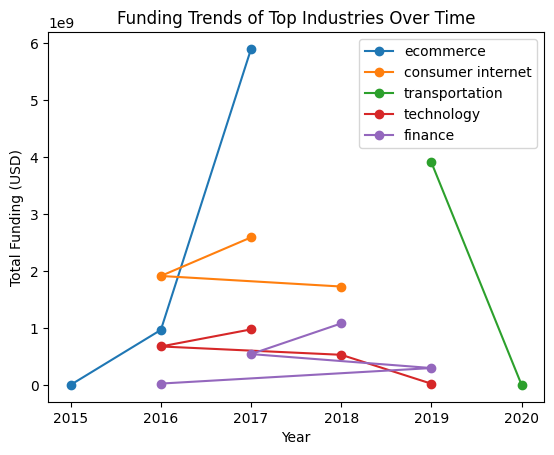

In [277]:
industry_funding_year = data.groupby(['Industry Vertical' , 'year'])['Amount in USD'].sum().sort_values(ascending=False).reset_index()
top_industries = data.groupby('Industry Vertical')['Amount in USD'].sum().sort_values(ascending=False).head(5).index

trend_data = industry_funding_year[industry_funding_year['Industry Vertical'].isin(top_industries)]
trend_data

print(trend_data)


for industry in top_industries:
    subset = trend_data[trend_data['Industry Vertical'] == industry]
    plt.plot(subset['year'], subset['Amount in USD'], marker='o', label=industry)

plt.title("Funding Trends of Top Industries Over Time")
plt.xlabel("Year")
plt.ylabel("Total Funding (USD)")
plt.legend()
plt.show()


In [313]:
Data.groupby('Industry Vertical')['Amount in USD'].sum().sort_values(ascending=False).head(10)

,Amount in USD
Industry Vertical,
unknown,33363263344
fintech,1153211265
e-commerce,795358860
b2b,585000000
health and wellness,462486000
last mile transportation,283300000
education,201500000
e-tech,200000000
finance,150900000


In [314]:
Data = pd.read_csv('/content/Clean Indian Funding Dataset.csv')
Data.columns.tolist(

)


['Sr No',
 'date',
 'Startup Name',
 'Industry Vertical',
 'SubVertical',
 'City',
 'Investors Name',
 'Investment Type',
 'Amount in USD',
 'Remarks',
 'day',
 'month',
 'year',
 'StartupName_Clean',
 'InvestorList',
 'Investor List']

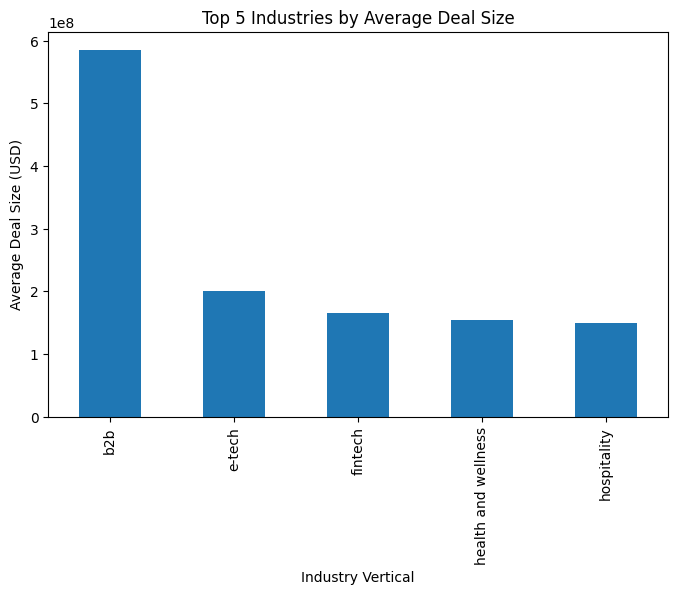

In [320]:

Industry = Data.groupby('Industry Vertical')

Df_Industry = pd.DataFrame({
    'Total Funding (USD)': Industry['Amount in USD'].sum(),
    'Number of Deals': Industry['Startup Name'].count()
})
Df_Industry['Average Deal Size (USD)'] = Df_Industry['Total Funding (USD)'] / Df_Industry['Number of Deals']
top_average = Df_Industry.sort_values(by='Average Deal Size (USD)', ascending=False).head(5)


top_average['Average Deal Size (USD)'].plot(
    kind='bar',
    title="Top 5 Industries by Average Deal Size",
    figsize=(8,5)
)
plt.ylabel("Average Deal Size (USD)")
plt.show()




In [318]:
Data

,Sr No,date,Startup Name,Industry Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD,Remarks,day,month,year,StartupName_Clean,Investor List
0,1,2020-01-09,BYJU’S,e-tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,200000000,NaN,9.0,January,2020.0,Byju’S,['Tiger Global Management']
1,2,2020-01-13,Shuttl,transportation,App based shuttle service,Gurugram,Susquehanna Growth Equity,Series C,8048394,NaN,13.0,January,2020.0,Shuttl,['Susquehanna Growth Equity']
2,3,2020-01-09,Mamaearth,e-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860,NaN,9.0,January,2020.0,Mamaearth,['Sequoia Capital India']
3,4,2020-01-02,https://www.wealthbucket.in/,fintech,Online Investment,Delhi,Vinod Khatumal,Pre-series A,3000000,NaN,2.0,January,2020.0,Wealthbucket,['Vinod Khatumal']
4,5,2020-01-02,Fashor,fashion and apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,NaN,2.0,January,2020.0,Fashor,['Sprout Venture Partners']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,3040,2015-01-29,Printvenue,unknown,unknown,unknown,Asia Pacific Internet Group,Private Equity,4500000,NaN,29.0,January,2015.0,Printvenue,['Asia Pacific Internet Group']
3040,3041,2015-01-29,Graphene,unknown,unknown,unknown,KARSEMVEN Fund,Private Equity,825000,Govt backed VC Fund,29.0,January,2015.0,Graphene,['KARSEMVEN Fund']
3041,3042,2015-01-30,Mad Street Den,unknown,unknown,unknown,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000,NaN,30.0,January,2015.0,Mad Street Den,"['Exfinity Fund', ' GrowX Ventures.']"
3042,3043,2015-01-30,Simplotel,unknown,unknown,unknown,MakeMyTrip,Private Equity,0,"Strategic Funding, Minority stake",30.0,January,2015.0,Simplotel,['MakeMyTrip']


Investment Type
Private Equity                 1356
Seed Funding                   1355
Seed/ Angel Funding              60
Seed / Angel Funding             47
Seed\\nFunding                   30
Debt Funding                     25
Series A                         24
Seed/Angel Funding               23
Series B                         20
Series C                         14
Series D                         12
Angel / Seed Funding              8
Seed Round                        7
Seed                              4
Private Equity Round              4
Pre-Series A                      4
Seed / Angle Funding              3
Equity                            2
Series E                          2
Corporate Round                   2
Venture Round                     2
Series F                          2
pre-Series A                      2
Seed Funding Round                1
Single Venture                    1
Maiden Round                      1
pre-series A                      1
Funding Roun

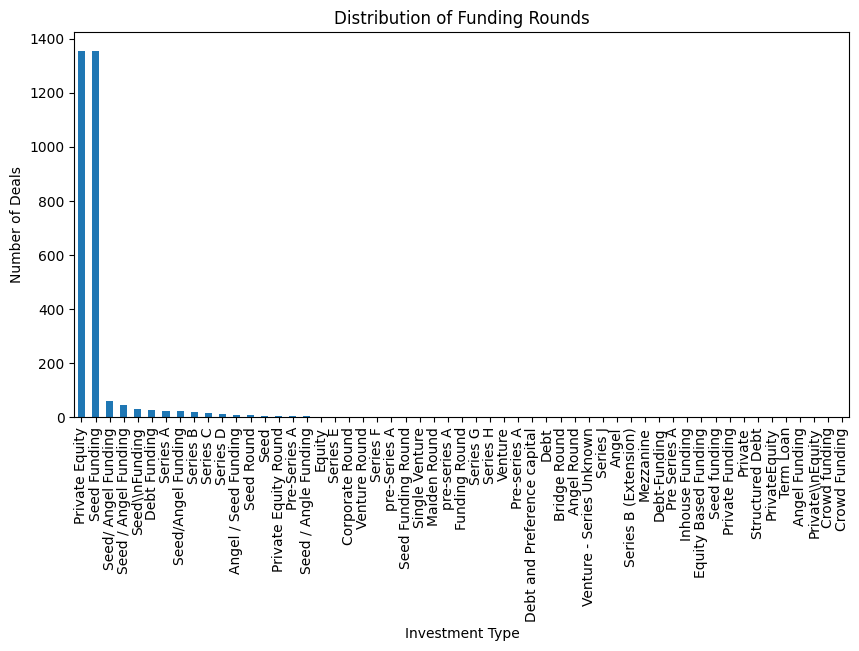

In [321]:
funding_distribution = Data['Investment Type'].value_counts()

print(funding_distribution)

funding_distribution.plot(
    kind='bar',
    figsize=(10,5),
    title="Distribution of Funding Rounds"
)
plt.ylabel("Number of Deals")
plt.xlabel("Investment Type")
plt.show()


Investment Type
Funding Round           1.000000e+09
Series B                2.399598e+08
Series G                2.310000e+08
Series H                1.500000e+08
Single Venture          1.400000e+08
Private Equity Round    1.265000e+08
Series D                1.234832e+08
Series C                7.462274e+07
Equity                  5.050000e+07
Series F                4.500000e+07
Seed / Angle Funding    3.343707e+07
Equity Based Funding    3.100000e+07
Seed Round              2.797143e+07
Private Equity          1.964773e+07
Corporate Round         1.904000e+07
Name: Amount in USD, dtype: float64


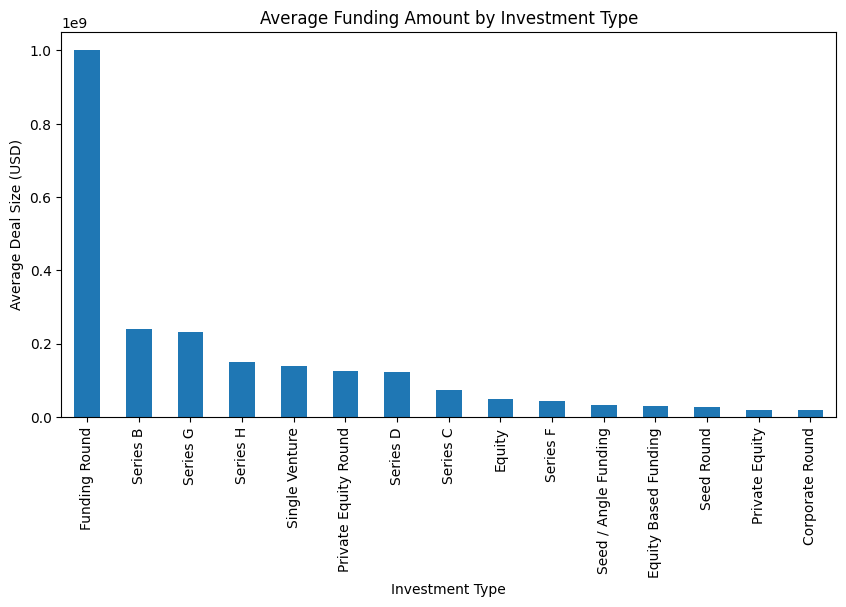

In [325]:
avg_funding_by_type = data.groupby('Investment Type')['Amount in USD'].mean().sort_values(ascending=False).head(15)

print(avg_funding_by_type)

avg_funding_by_type.plot(
    kind='bar',
    figsize=(10,5),
    title="Average Funding Amount by Investment Type"
)
plt.ylabel("Average Deal Size (USD)")
plt.xlabel("Investment Type")
plt.show()


In [408]:
funding_distribution.head(1)  # most common funding Stage

,count
Investment Type,
Private Equity,1356


In [586]:
df_Exploded = Data.explode('InvestorList')
df_Exploded['InvestorList'] = df_Exploded['InvestorList'].str.lower()

,Sr No,date,Startup Name,Industry Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD,Remarks,day,month,year,StartupName_Clean,InvestorList
0,1,2020-01-09,BYJU’S,e-tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,200000000,NaN,9.0,January,2020.0,Byju’S,tiger global management
1,2,2020-01-13,Shuttl,transportation,App based shuttle service,Gurugram,Susquehanna Growth Equity,Series C,8048394,NaN,13.0,January,2020.0,Shuttl,susquehanna growth equity
2,3,2020-01-09,Mamaearth,e-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860,NaN,9.0,January,2020.0,Mamaearth,sequoia capital india
3,4,2020-01-02,https://www.wealthbucket.in/,fintech,Online Investment,Delhi,Vinod Khatumal,Pre-series A,3000000,NaN,2.0,January,2020.0,Wealthbucket,vinod khatumal
4,5,2020-01-02,Fashor,fashion and apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,NaN,2.0,January,2020.0,Fashor,sprout venture partners
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,3041,2015-01-29,Graphene,unknown,unknown,unknown,KARSEMVEN Fund,Private Equity,825000,Govt backed VC Fund,29.0,January,2015.0,Graphene,karsemven fund
3041,3042,2015-01-30,Mad Street Den,unknown,unknown,unknown,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000,NaN,30.0,January,2015.0,Mad Street Den,exfinity fund
3041,3042,2015-01-30,Mad Street Den,unknown,unknown,unknown,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000,NaN,30.0,January,2015.0,Mad Street Den,growx ventures.
3042,3043,2015-01-30,Simplotel,unknown,unknown,unknown,MakeMyTrip,Private Equity,0,"Strategic Funding, Minority stake",30.0,January,2015.0,Simplotel,makemytrip


In [602]:
df_Exploded['InvestorList'] =df_Exploded['InvestorList'].str.strip().str.replace('  ','unknown')

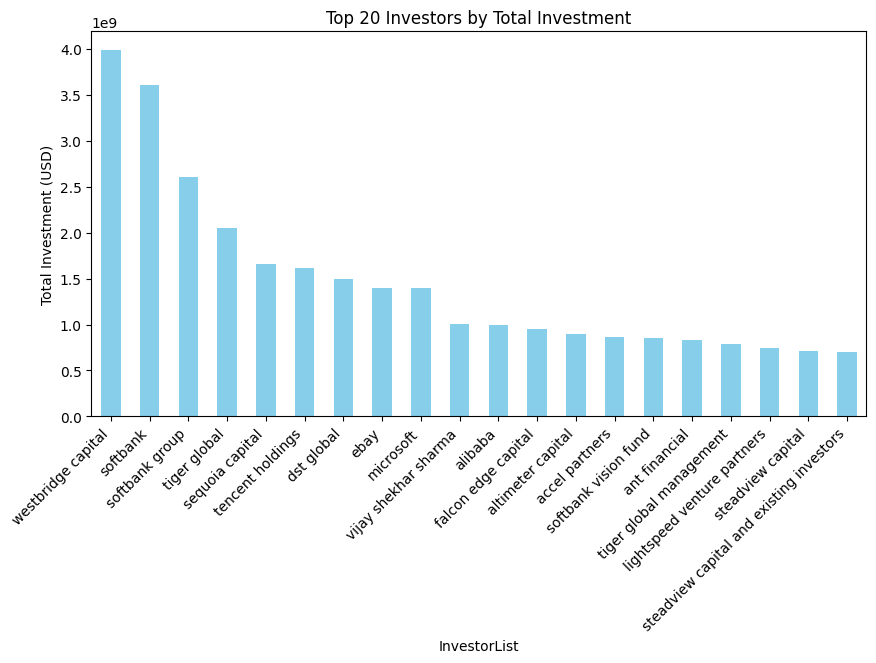

In [610]:
top20 = df_Exploded.groupby('InvestorList')['Amount in USD'].sum().sort_values(ascending=False).head(20)

top20.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Top 20 Investors by Total Investment")
plt.ylabel("Total Investment (USD)")
plt.xticks(rotation=45, ha='right')
plt.show()

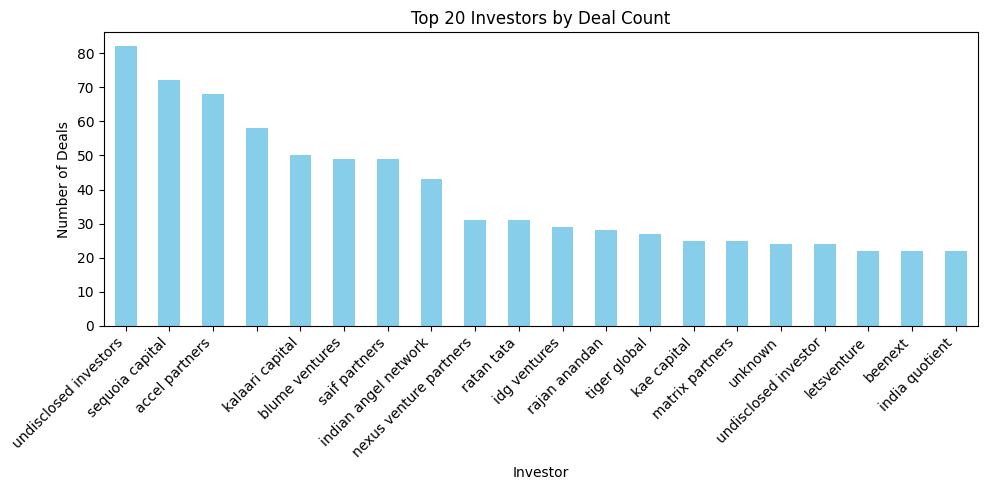

In [618]:
  top_deals = df_Exploded.groupby('InvestorList')['Startup Name'].count().sort_values(ascending=False).head(20)
  top_deals


# Simple bar chart for top 20 investors by deal count
top_deals.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Top 20 Investors by Deal Count")
plt.ylabel("Number of Deals")
plt.xlabel("Investor")
plt.xticks(rotation=45, ha='right')  # rotate labels so they don't overlap
plt.tight_layout()
plt.show()


<Axes: xlabel='Startup Name'>

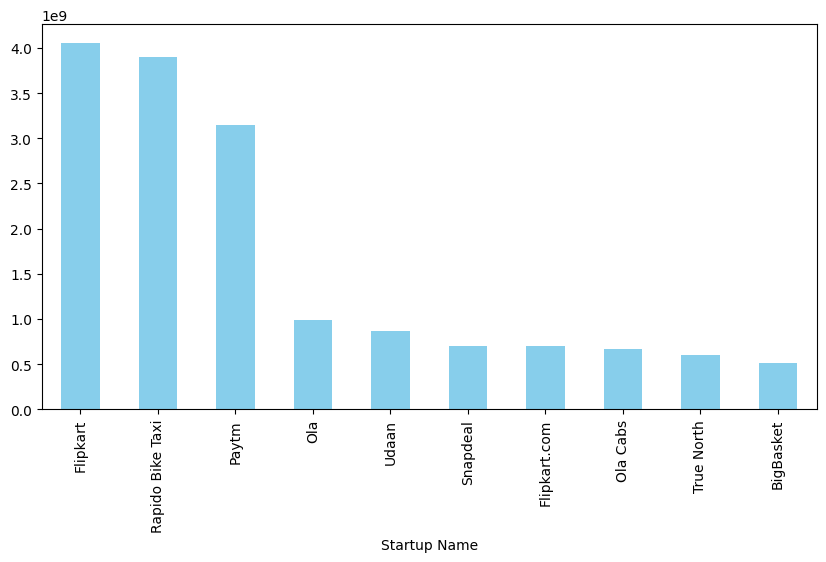

In [619]:
top_startups = Data.groupby('Startup Name')['Amount in USD'].sum().sort_values(ascending=False).head(10)
top_startups.plot(kind='bar', figsize=(10,5), color='skyblue')


In [620]:
mega_deals = Data[Data['Amount in USD'] > 100_000_000].sort_values('Amount in USD', ascending=False)
print(mega_deals[['Startup Name', 'Amount in USD']])


                  Startup Name  Amount in USD
60            Rapido Bike Taxi     3900000000
651                   Flipkart     2500000000
830                      Paytm     1400000000
966                   Flipkart     1400000000
31                       Paytm     1000000000
2648              Flipkart.com      700000000
2459                     Paytm      680000000
188                 True North      600000000
33                       Udaan      585000000
2244                       Ola      500000000
2470                  Snapdeal      500000000
42                       GOQii      450000000
2820                   Olacabs      400000000
924                        Ola      330000000
350                  BigBasket      300000000
135        Automation Anywhere      300000000
29             Vogo Automotive      283000000
514                  Edelweiss      270000000
889                   Ola Cabs      260000000
586                  OYO Rooms      250000000
906                  Oyo Rooms    

In [664]:
Data['date'] = pd.to_datetime(Data['date'])


In [667]:
df_sorted = Data.sort_values(['date' , 'Startup Name'])
df_sorted.tail(50)


,Sr No,date,Startup Name,Industry Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD,Remarks,day,month,year,StartupName_Clean,InvestorList
39,40,2019-09-04,75F,iot,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,18000000,NaN,4.0,September,2019.0,75F,[Breakthrough Energy Ventures]
41,42,2019-09-04,Atomberg Technology,consumer technology,"Consumer Electronics, Home Appliances",Mumbai,A91 Partners,Series A,10000000,NaN,4.0,September,2019.0,Atomberg Technology,[A91 Partners]
36,37,2019-09-04,Cashflo,fintech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,3300000,NaN,4.0,September,2019.0,Cashflo,[SAIF Partners]
37,38,2019-09-04,Digital F5,advertising and marketing,Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,6000000,NaN,4.0,September,2019.0,Digital F5,[TIW Private Equity]
42,43,2019-09-04,GOQii,health and wellness,Wearable Fitness Bands,Menlo Park,Bennett Coleman and Company Ltd (BCCL),Series C,450000000,NaN,4.0,September,2019.0,Goqii,[Bennett Coleman and Company Ltd (BCCL)]
40,41,2019-09-04,Myelin Foundry,information technology,Deep-technology,Bangalore,Endiya Partners,Seed,1000000,NaN,4.0,September,2019.0,Myelin Foundry,[Endiya Partners]
35,36,2019-09-05,FPL Technologies,fintech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4500000,NaN,5.0,September,2019.0,Fpl Technologies,"[Matrix Partners India, Sequoia India]"
33,34,2019-10-02,Udaan,b2b,Business development,Bangalore,"Altimeter Capital, DST Global",Series D,585000000,NaN,2.0,October,2019.0,Udaan,"[Altimeter Capital, DST Global]"
32,33,2019-10-04,Dunzo,customer service,Delivery Service,Bangalore,Lightbox,Series D,45000000,NaN,4.0,October,2019.0,Dunzo,[Lightbox]
34,35,2019-10-21,The Man Company,consumer goods,Beauty and Grooming,Gurugram,Ayushmann Khurana,Corporate Round,0,NaN,21.0,October,2019.0,The Man Company,[Ayushmann Khurana]


In [676]:
df_sorted['Days Between Rounds'] = df_sorted.groupby('Startup Name')['date'].diff().dt.days

In [677]:
df_sorted

,Sr No,date,Startup Name,Industry Vertical,SubVertical,City,Investors Name,Investment Type,Amount in USD,Remarks,day,month,year,StartupName_Clean,InvestorList,Days Between Rounds
2989,2990,2015-01-02,LensKart,unknown,unknown,unknown,"TPG Growth, TR Capital, IDG Ventures",Private Equity,2150000,NaN,2.0,January,2015.0,Lenskart,"[TPG Growth, TR Capital, IDG Ventures]",NaN
2990,2991,2015-01-02,VioletStreet,unknown,unknown,unknown,"Venkat Vallabhneni, Sudhakar Reddy, Srinivasa ...",Seed\\nFunding,315000,NaN,2.0,January,2015.0,Violetstreet,"[Venkat Vallabhneni, Sudhakar Reddy, Srinivasa...",NaN
2992,2993,2015-01-05,#Fame,unknown,unknown,unknown,TO THE NEW Ventures,Private Equity,10000000,NaN,5.0,January,2015.0,#Fame,[TO THE NEW Ventures],NaN
2993,2994,2015-01-05,Gympik,unknown,unknown,unknown,"Tom Clausen, Rohan Ajila, Haldyn Glass",Seed Funding,135000,NaN,5.0,January,2015.0,Gympik,"[Tom Clausen, Rohan Ajila, Haldyn Glass]",NaN
2991,2992,2015-01-05,Lookup,unknown,unknown,unknown,"DeNA Co., Japan , Teruhide Sato (in Addition t...",Seed\\nFunding,380000,NaN,5.0,January,2015.0,Lookup,"[DeNA Co., Japan & Teruhide Sato (in Addition ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775,2776,NaT,Mobiefit,unknown,unknown,Goa,Prototyze,Seed Funding,0,NaN,NaN,NaN,NaN,Mobiefit,[Prototyze],NaN
2776,2777,NaT,Plancess,unknown,unknown,Mumbai,"Rajendra Gogri,\\xc2\\xa0 Chandrakant Gogri",Seed Funding,2000000,NaN,NaN,NaN,NaN,Plancess,"[Rajendra Gogri, \\xc2\\xa0 Chandrakant Gogri]",NaN
2831,2832,NaT,The Porter,unknown,unknown,Mumbai,Kae Capital,Seed Funding,500000,NaN,NaN,NaN,NaN,The Porter,[Kae Capital],NaN
3011,3012,NaT,Wishberry,unknown,unknown,unknown,"Rajan Anandan, Shankar Mahadevan, Deep Kalra ,...",Seed Funding,650000,NaN,NaN,NaN,NaN,Wishberry,"[Rajan Anandan, Shankar Mahadevan, Deep Kalra ...",NaN


In [679]:
average_days = df_sorted.groupby('Startup Name')['Days Between Rounds'].mean()

,Days Between Rounds
Startup Name,
"""BYJU\\'S""",NaN
#Fame,NaN
121Policy,NaN
19th mile,NaN
1Crowd,NaN
...,...
vImmune,NaN
vPhrase Analytics,NaN
wWhere,NaN


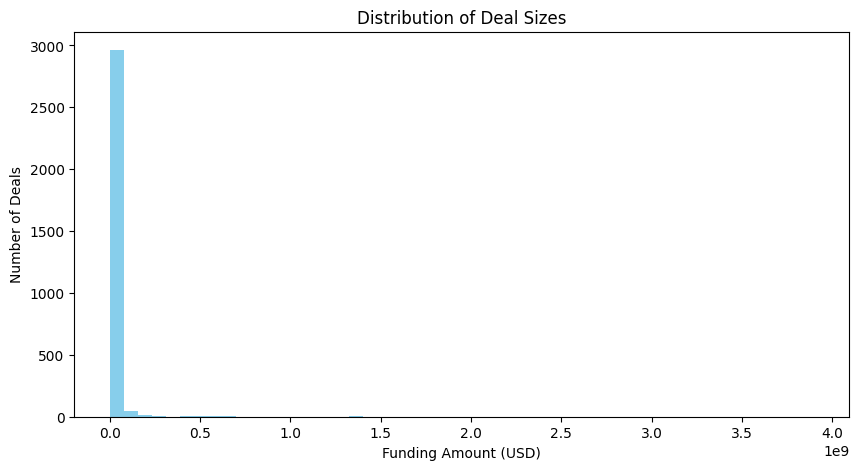

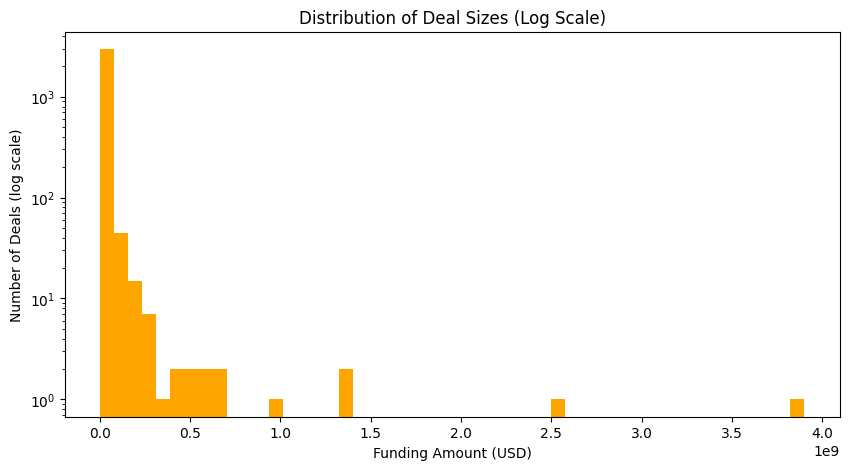

In [680]:
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(10,5))
plt.hist(Data['Amount in USD'], bins=50, color='skyblue')
plt.title("Distribution of Deal Sizes")
plt.xlabel("Funding Amount (USD)")
plt.ylabel("Number of Deals")
plt.show()

# Optional: log scale
plt.figure(figsize=(10,5))
plt.hist(Data['Amount in USD'], bins=50, color='orange', log=True)
plt.title("Distribution of Deal Sizes (Log Scale)")
plt.xlabel("Funding Amount (USD)")
plt.ylabel("Number of Deals (log scale)")
plt.show()


In [682]:
mean_funding = Data['Amount in USD'].mean()
median_funding = Data['Amount in USD'].median()

print("Mean Funding Amount: ", mean_funding)
print("Median Funding Amount: ", median_funding)


Mean Funding Amount:  12502542.004927726
Median Funding Amount:  500000.0
